In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
df_dfr = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_fertility_rates.csv')
df_gii = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/HDR_gii.csv')
df_gdp = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_gdp.csv')
df_ii = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_income_inequality.csv')
df_wer = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_women_employment_rate.csv')
df_wip = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/oecd_women_in_politics.csv')

# Intro

## oecd_fertility_rates

In [189]:
df_dfr = df_dfr[['TIME', 'LOCATION', 'Value']]
df_dfr = df_dfr.rename(columns={'Value': 'Fertility Rates'})
df_dfr.head()

,TIME,LOCATION,Fertility Rates
0,1970,DEU,2.03
1,1971,DEU,1.97
2,1972,DEU,1.74
3,1973,DEU,1.56
4,1974,DEU,1.53


In [190]:
df_dfr.columns

Index(['TIME', 'LOCATION', 'Fertility Rates'], dtype='object')

In [191]:
df_dfr.LOCATION.unique()

array(['DEU', 'ITA', 'KOR'], dtype=object)

In [192]:
locations = ['ITA', 'DEU', 'KOR']
dfs = {}

for loc in locations:
    dfs[loc] = df_dfr[df_dfr['LOCATION'] == loc]

df_dfr_ita = dfs['ITA']
df_dfr_deu = dfs['DEU']
df_dfr_kor = dfs['KOR']

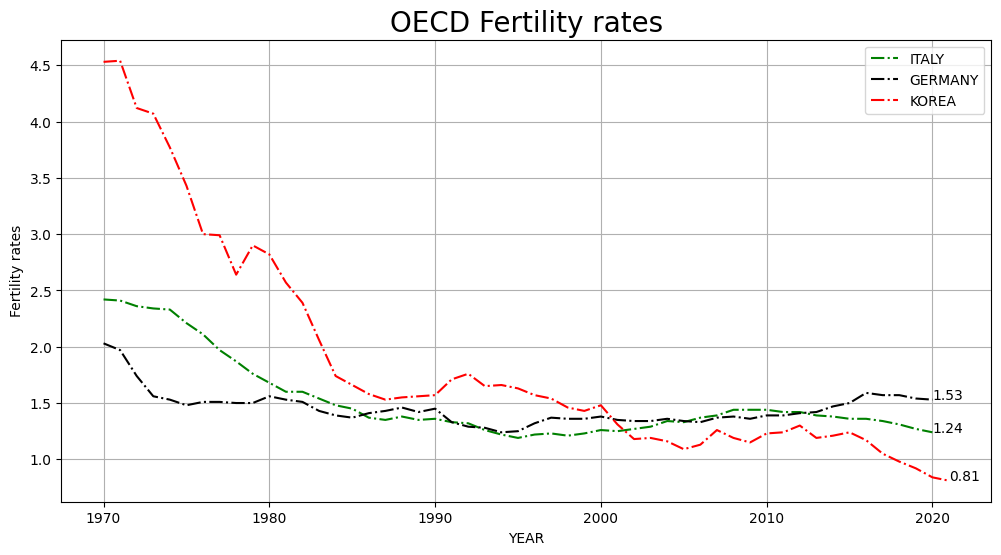

<Figure size 600x1200 with 0 Axes>

<Figure size 600x1200 with 0 Axes>

In [193]:
x1 = df_dfr_ita['TIME'].to_xarray()
x2 = df_dfr_deu['TIME'].to_xarray()
x3 = df_dfr_kor['TIME'].to_xarray()

y1=df_dfr_ita['Fertility Rates'].to_xarray()
y2=df_dfr_deu['Fertility Rates'].to_xarray()
y3=df_dfr_kor['Fertility Rates'].to_xarray()

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 그래프 그리기
plt.plot(x1, y1, color='g', ls='dashdot', label='ITALY')
plt.plot(x2, y2, color='k', ls='dashdot', label='GERMANY')
plt.plot(x3, y3, color='r', ls='dashdot', label='KOREA')

# 그래프 타이틀, 축 레이블, 범례 추가
plt.title('OECD Fertility rates', fontsize=20)
plt.xlabel('YEAR')
plt.ylabel('Fertility rates')
plt.legend()

# 마지막 값 표시하기
plt.text(x1[-1], y1[-1], f'{y1[-1]:.2f}')
plt.text(x2[-1], y2[-1], f'{y2[-1]:.2f}')
plt.text(x3[-1], y3[-1], f'{y3[-1]:.2f}')

# 그래프 보여주기
plt.grid()
plt.show()
plt.figure(figsize=(6, 12))

# Body

## Korea

In [194]:
df_pef = pd.read_csv('/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/private_education_fee.csv')
df_wafm = pd.read_csv("/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/women's average age at first marriage .csv")
df_kor_gdp = pd.read_csv("/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/korean_gdp.csv")

In [195]:
file = [df_gii, df_gdp, df_ii, df_wer, df_wip, df_pef, df_wafm]

for i in file:
    print(i.iloc[:,:4].head())

  iso3               country    hdicode region
0  AFG           Afghanistan        Low     SA
1  AGO                Angola     Medium    SSA
2  ALB               Albania       High    ECA
3  AND               Andorra  Very High    NaN
4  ARE  United Arab Emirates  Very High     AS
  LOCATION INDICATOR SUBJECT  MEASURE
0      AUS       GDP     TOT  USD_CAP
1      AUS       GDP     TOT  USD_CAP
2      AUS       GDP     TOT  USD_CAP
3      AUS       GDP     TOT  USD_CAP
4      AUS       GDP     TOT  USD_CAP
  LOCATION   INDICATOR SUBJECT MEASURE
0      AUS  INCOMEINEQ    GINI    INEQ
1      AUS  INCOMEINEQ    GINI    INEQ
2      AUS  INCOMEINEQ    GINI    INEQ
3      AUS  INCOMEINEQ    GINI    INEQ
4      AUS  INCOMEINEQ    GINI    INEQ
  LOCATION INDICATOR SUBJECT    MEASURE
0      AUS       EMP   WOMEN  PC_WKGPOP
1      AUS       EMP   WOMEN  PC_WKGPOP
2      AUS       EMP   WOMEN  PC_WKGPOP
3      AUS       EMP   WOMEN  PC_WKGPOP
4      AUS       EMP   WOMEN  PC_WKGPOP
  LOCATION      

In [196]:
df_gii_kor = df_gii[df_gii['country']=='Korea (Republic of)'].T
df_gii_kor=df_gii_kor.reset_index()
df_gii_kor.columns = ['TIME', 'Gender Inequality Index']
df_gii_kor = df_gii_kor[df_gii_kor['TIME'].str.startswith('gii')]
df_gii_kor['TIME'] = df_gii_kor['TIME'].str.extract(r'_([\d]+)').astype(int)
df_gii_kor = df_gii_kor.iloc[1:]
df_gii_kor.reset_index(drop=True, inplace=True)

# TIME 컬럼과 Gender Inequality Index컬럼을 숫자형으로 변환
df_gii_kor['TIME'] = pd.to_numeric(df_gii_kor['TIME'])
df_gii_kor['Gender Inequality Index'] = df_gii_kor['Gender Inequality Index'].astype(float)
df_gii_kor.head()

,TIME,Gender Inequality Index
0,1990,0.298
1,1991,0.290
2,1992,0.280
3,1993,0.265
4,1994,0.256


In [197]:
df_pef = df_pef.replace(' ', '', regex=True)
df_pef = df_pef.T.reset_index()
df_pef.columns = df_pef.iloc[0]
# df_pef = df_pef[1:]
df_pef_mean = df_pef[df_pef['과목및유형'].str.startswith('평균')]
df_pef_mean = df_pef_mean[['과목 및 유형', '사교육비']]
df_pef_mean.columns = ['TIME', 'Private Education Expense']
df_pef_mean['TIME'] = pd.to_numeric(df_pef_mean['TIME'])
df_pef_mean['Private Education Expense'] = df_pef_mean['Private Education Expense'].astype(float)
df_pef_mean['Private Education Expense'] = df_pef_mean['Private Education Expense']*10000
df_pef_mean


,TIME,Private Education Expense
1,2007,222000.0
6,2008,233000.0
11,2009,242000.0
16,2010,240000.0
21,2011,240000.0
26,2012,236000.0
31,2013,239000.0
36,2014,242000.0
41,2015,244000.0
46,2016,256000.0


In [198]:
df_gdp_kor = df_kor_gdp.iloc[1].reset_index().iloc[1:]
df_gdp_kor.columns = ['TIME', 'GDP']
df_gdp_kor['TIME'] = pd.to_numeric(df_gdp_kor['TIME'])
df_gdp_kor['GDP'] = df_gdp_kor['GDP'].astype(float)

df_ii_kor = df_ii[df_ii['LOCATION']=='KOR']
df_ii_kor = df_ii_kor[['TIME', 'Value']]
df_ii_kor.columns = ['TIME', 'Income_Inequality']
df_ii_kor['TIME'] = pd.to_numeric(df_ii_kor['TIME'])
df_ii_kor['Income_Inequality'] = df_ii_kor['Income_Inequality'].astype(float)

df_wer_kor = df_wer[df_wer['LOCATION']=='KOR']
df_wer_kor = df_wer_kor[['TIME', 'Value']]
df_wer_kor.columns = ['TIME', 'Women Employment Rate']
df_wer_kor['TIME'] = pd.to_numeric(df_wer_kor['TIME'])
df_wer_kor['Women Employment Rate'] = df_wer_kor['Women Employment Rate'].astype(float)

df_wip_kor = df_wip[df_wip['LOCATION']=='KOR']
df_wip_kor = df_wip_kor[['TIME', 'Value']]
df_wip_kor.columns = ['TIME', 'Women In Politics']
df_wip_kor['TIME'] = pd.to_numeric(df_wip_kor['TIME'])
df_wip_kor['Women In Politics'] = df_wip_kor['Women In Politics'].astype(float)

In [199]:
df_wafm = pd.read_csv("/Users/ikjuncho/Documents/GitHub/Declining_Fertility_Rates/women's average age at first marriage .csv")
df_wafm = df_wafm.T.reset_index()
df_wafm = df_wafm[['index',1]]
df_wafm.columns = ['TIME', "women's average age"]
df_wafm = df_wafm.iloc[1:]
df_wafm['TIME'] = pd.to_numeric(df_wafm['TIME'])
df_wafm["women's average age"] = df_wafm["women's average age"].astype(float)
df_wafm.head()

,TIME,women's average age
1,1990,24.78
2,1991,24.84
3,1992,24.93
4,1993,25.01
5,1994,25.14


In [200]:
df_kor = pd.merge(df_gii_kor, df_gdp_kor, on='TIME', how='outer')
df_kor = pd.merge(df_kor, df_ii_kor, on='TIME', how='outer')
df_kor = pd.merge(df_kor, df_wer_kor, on='TIME', how='outer')
df_kor = pd.merge(df_kor, df_pef_mean, on='TIME', how='outer')
df_kor = pd.merge(df_kor, df_wafm, on='TIME', how='outer')

df_dfr_kor = df_dfr_kor[['TIME', 'Fertility Rates']]
df_kor = pd.merge(df_kor, df_dfr_kor, on='TIME', how='outer')

# TIME을 기준으로 정렬
df_kor = df_kor.sort_values('TIME')
df_kor.reset_index(inplace=True, drop=True)
df_kor.head(15)

,TIME,Gender Inequality Index,GDP,Income_Inequality,Women Employment Rate,Private Education Expense,women's average age,Fertility Rates
0,1970,NaN,81.6,NaN,NaN,NaN,NaN,4.53
1,1971,NaN,95.4,NaN,NaN,NaN,NaN,4.54
2,1972,NaN,108.6,NaN,NaN,NaN,NaN,4.12
3,1973,NaN,138.8,NaN,NaN,NaN,NaN,4.07
4,1974,NaN,195.4,NaN,NaN,NaN,NaN,3.77
5,1975,NaN,217.8,NaN,NaN,NaN,NaN,3.43
6,1976,NaN,299.0,NaN,NaN,NaN,NaN,3.00
7,1977,NaN,384.5,NaN,NaN,NaN,NaN,2.99
8,1978,NaN,539.5,NaN,NaN,NaN,NaN,2.64
9,1979,NaN,646.8,NaN,NaN,NaN,NaN,2.90


In [201]:
df_kor_11_20 = df_kor.loc[41:50]
df_kor_11_20 = df_kor_11_20.set_index('TIME')
df_kor_11_20

,Gender Inequality Index,GDP,Income_Inequality,Women Employment Rate,Private Education Expense,women's average age,Fertility Rates
TIME,,,,,,,
2011,0.113,12534.3,0.388,53.14200,240000.0,29.14,1.24
2012,0.108,12779.6,0.385,53.54788,236000.0,29.41,1.30
2013,0.108,13705.6,0.372,53.98439,239000.0,29.59,1.19
2014,0.100,14839.5,0.363,55.01185,242000.0,29.81,1.21
2015,0.096,14653.4,0.352,55.73558,244000.0,29.96,1.24
2016,0.086,15000.3,0.355,56.13441,256000.0,30.11,1.17
2017,0.080,16233.1,0.354,56.85481,272000.0,30.24,1.05
2018,0.078,17251.6,0.345,57.15882,291000.0,30.40,0.98
2019,0.078,16510.1,0.339,57.78054,321000.0,30.59,0.92


In [202]:
df_kor.corr()

,TIME,Gender Inequality Index,GDP,Income_Inequality,Women Employment Rate,Private Education Expense,women's average age,Fertility Rates
TIME,1.000000,-0.937626,0.960989,-0.972097,0.953798,0.855110,0.997590,-0.861354
Gender Inequality Index,-0.937626,1.000000,-0.885791,0.937427,-0.879757,-0.873351,-0.936607,0.926871
GDP,0.960989,-0.885791,1.000000,-0.920327,0.956109,0.728297,0.974915,-0.706885
Income_Inequality,-0.972097,0.937427,-0.920327,1.000000,-0.929778,-0.829744,-0.980997,0.853847
Women Employment Rate,0.953798,-0.879757,0.956109,-0.929778,1.000000,0.817093,0.935355,-0.765496
Private Education Expense,0.855110,-0.873351,0.728297,-0.829744,0.817093,1.000000,0.831514,-0.937474
women's average age,0.997590,-0.936607,0.974915,-0.980997,0.935355,0.831514,1.000000,-0.896349
Fertility Rates,-0.861354,0.926871,-0.706885,0.853847,-0.765496,-0.937474,-0.896349,1.000000


In [203]:
df_kor_11_20.corr()

,Gender Inequality Index,GDP,Income_Inequality,Women Employment Rate,Private Education Expense,women's average age,Fertility Rates
Gender Inequality Index,1.000000,-0.942051,0.937427,-0.945228,-0.874662,-0.976860,0.895582
GDP,-0.942051,1.000000,-0.920327,0.960289,0.839857,0.940154,-0.854200
Income_Inequality,0.937427,-0.920327,1.000000,-0.929778,-0.829744,-0.980997,0.853847
Women Employment Rate,-0.945228,0.960289,-0.929778,1.000000,0.857084,0.946541,-0.810015
Private Education Expense,-0.874662,0.839857,-0.829744,0.857084,1.000000,0.882431,-0.949994
women's average age,-0.976860,0.940154,-0.980997,0.946541,0.882431,1.000000,-0.899917
Fertility Rates,0.895582,-0.854200,0.853847,-0.810015,-0.949994,-0.899917,1.000000


In [204]:
df_kor.columns

Index(['TIME', 'Gender Inequality Index', 'GDP', 'Income_Inequality',
       'Women Employment Rate', 'Private Education Expense',
       'women's average age', 'Fertility Rates'],
      dtype='object')

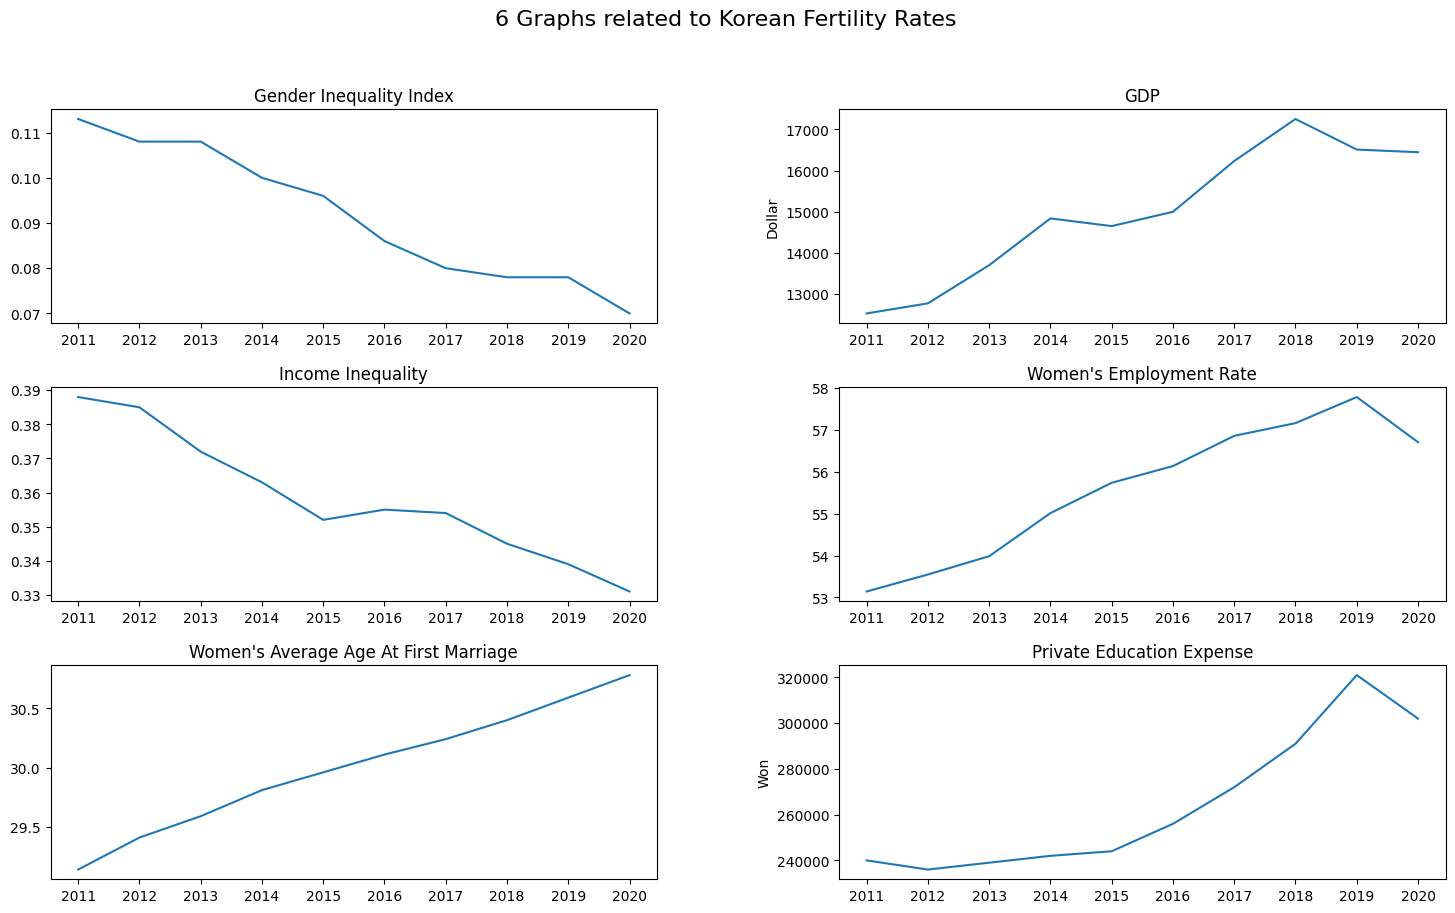

In [205]:
# 데이터프레임 생성
df = pd.DataFrame({
    'x': df_kor_11_20.index,
    'y1': df_kor_11_20['Gender Inequality Index'].to_xarray(),
    'y2': df_kor_11_20['GDP'].to_xarray(),
    'y3': df_kor_11_20['Income_Inequality'].to_xarray(),
    'y4': df_kor_11_20['Women Employment Rate'].to_xarray(),
    'y5': df_kor_11_20["women's average age"].to_xarray(),
    'y6': df_kor_11_20['Private Education Expense'].to_xarray()
})

# Figure와 Axes 생성
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))


# 각 Axes에 그래프 그리기
axes[0, 0].plot(df['x'], df['y1'])
axes[0, 0].set_xticks(np.arange(2011, 2021))
axes[0, 0].set_title('Gender Inequality Index')

axes[0, 1].plot(df['x'], df['y2'])
axes[0, 1].set_xticks(np.arange(2011, 2021))
axes[0, 1].set_ylabel('Dollar')
axes[0, 1].set_title('GDP')

axes[1, 0].plot(df['x'], df['y3'])
axes[1, 0].set_xticks(np.arange(2011, 2021))
axes[1, 0].set_title('Income Inequality')

axes[1, 1].plot(df['x'], df['y4'])
axes[1, 1].set_xticks(np.arange(2011, 2021))
axes[1, 1].set_title("Women's Employment Rate")

axes[2, 0].plot(df['x'], df['y5'])
axes[2, 0].set_xticks(np.arange(2011, 2021))
axes[2, 0].set_title("Women's Average Age At First Marriage")

axes[2, 1].plot(df['x'], df['y6'])
axes[2, 1].set_xticks(np.arange(2011, 2021))
axes[2, 1].set_ylabel('Won')
axes[2, 1].set_title('Private Education Expense')

# 전체 그래프 제목 설정
fig.suptitle('6 Graphs related to Korean Fertility Rates', fontsize=16)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# 그래프 출력
plt.show()
